LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv('indicadores-mundiales.csv', sep=',',encoding='latin-1')

In [7]:
df.columns


Index(['Ano', 'Dias para iniciar un negocio', 'Emisiones de CO2',
       'Esperanza de vida (mujeres)', 'Esperanza de vida (varones)',
       'Facilidad para hacer negocios', 'Gasto en salud ( del PIB)',
       'Gasto en salud (per capita)', 'Horas preparar los impuestos',
       'Interes de prestamos', 'PIB', 'Pais', 'Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+', 'Poblacion total',
       'Poblacion urbana', 'Region', 'Tasa de mortalidad infantil',
       'Tasa de natalidad', 'Tasa tributaria empresarial', 'Turismo emisor',
       'Turismo receptivo', 'Uso de Internet', 'Uso de energia',
       'Uso de telefonos celulares'],
      dtype='object')

In [9]:
porcentaje_pob = df.groupby('Region').sum().sort_values(by='Region')[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
porcentaje_pob

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,53.186,106.687,10.130
Europa,37.802,138.306,28.905
Las Americas,53.755,109.018,12.231
Oceania,17.848,31.331,2.825
Oriente Medio,17.547,32.511,1.942
africa,111.362,144.527,9.117


## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


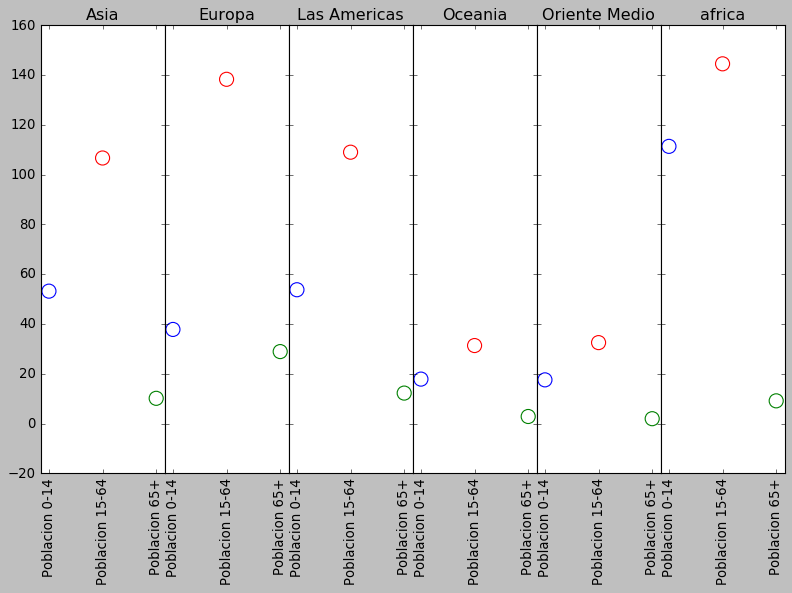

In [14]:
plt.style.use('classic')
fig, ax = plt.subplots(1,6, sharex='col', sharey='row', figsize=(12, 7))
plt.subplots_adjust(wspace = 0)
for index, colname in enumerate(porcentaje_pob.T.columns):
    ax[index].scatter(list(porcentaje_pob.T.index), porcentaje_pob.T[colname], color='White',s=160, edgecolor=['blue', 'red', 'green'])
    ax[index].set_xticklabels(list(porcentaje_pob.T.index),rotation='90');
    ax[index].set_title(colname)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


In [15]:
porcentaje_pob


,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,53.186,106.687,10.130
Europa,37.802,138.306,28.905
Las Americas,53.755,109.018,12.231
Oceania,17.848,31.331,2.825
Oriente Medio,17.547,32.511,1.942
africa,111.362,144.527,9.117


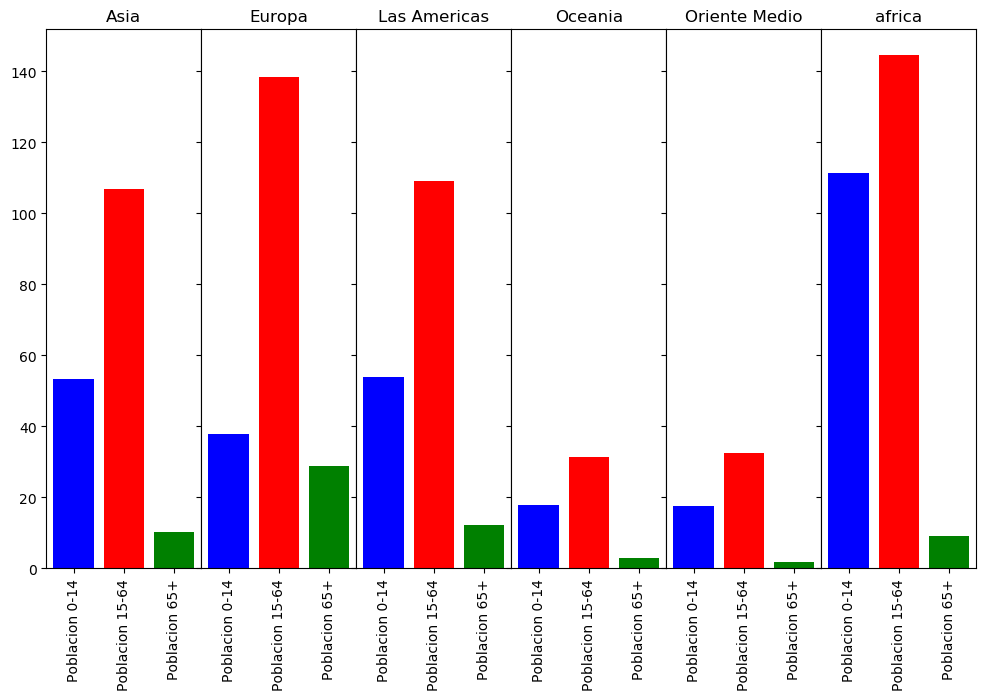

In [20]:
plt.style.use('default')
fig, ax = plt.subplots(1,6, sharex='col', sharey='row', figsize=(12, 7))
plt.subplots_adjust(wspace = 0)
for index, colname in enumerate(porcentaje_pob.T.columns):
    ax[index].bar(list(porcentaje_pob.T.index), porcentaje_pob.T[colname], color=['blue', 'red', 'green'])
    ax[index].set_xticklabels(list(porcentaje_pob.T.index),rotation='90');
    ax[index].set_title(colname)
    
  

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

In [21]:
porcentaje_pob

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,53.186,106.687,10.130
Europa,37.802,138.306,28.905
Las Americas,53.755,109.018,12.231
Oceania,17.848,31.331,2.825
Oriente Medio,17.547,32.511,1.942
africa,111.362,144.527,9.117


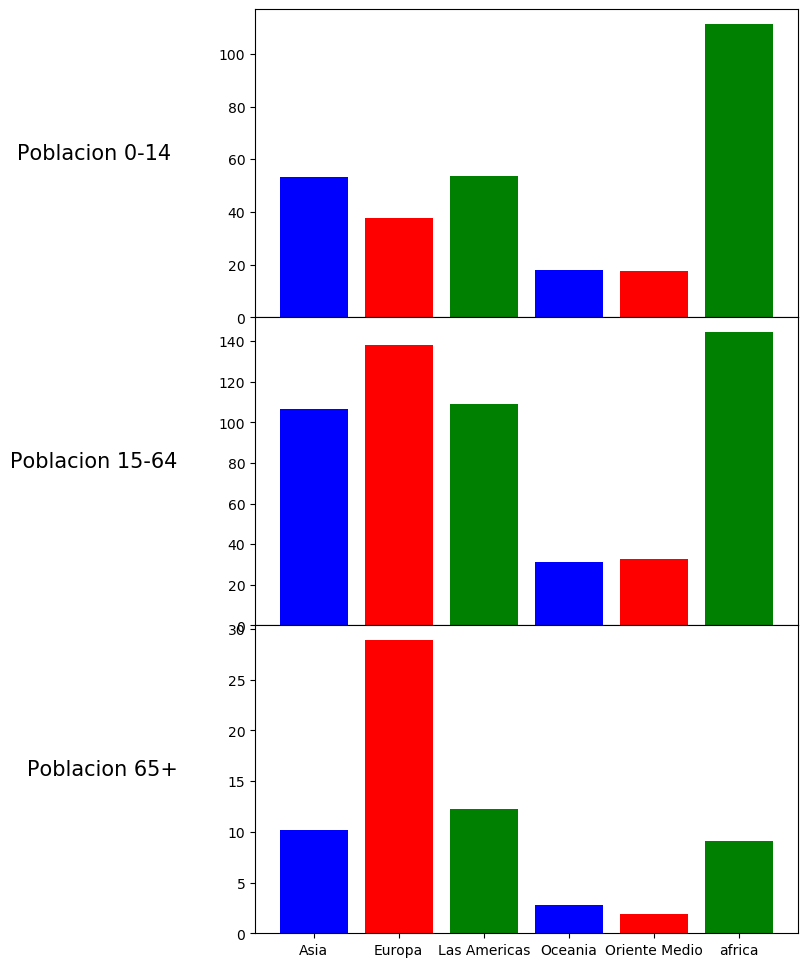

In [49]:
plt.style.use('default')
fig, ax = plt.subplots(3,1, sharex='col', sharey='row', figsize=(7, 12))
plt.subplots_adjust(hspace=0)
for i in range(len(porcentaje_pob.columns)):
    ax[i].bar(list(porcentaje_pob.index), porcentaje_pob[porcentaje_pob.iloc[i].index[i]], color=['blue', 'red', 'green'])
    ax[i].set_ylabel(porcentaje_pob.iloc[i].index[i], rotation=0, labelpad=90, fontsize=15)
   

In [ ]:
## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

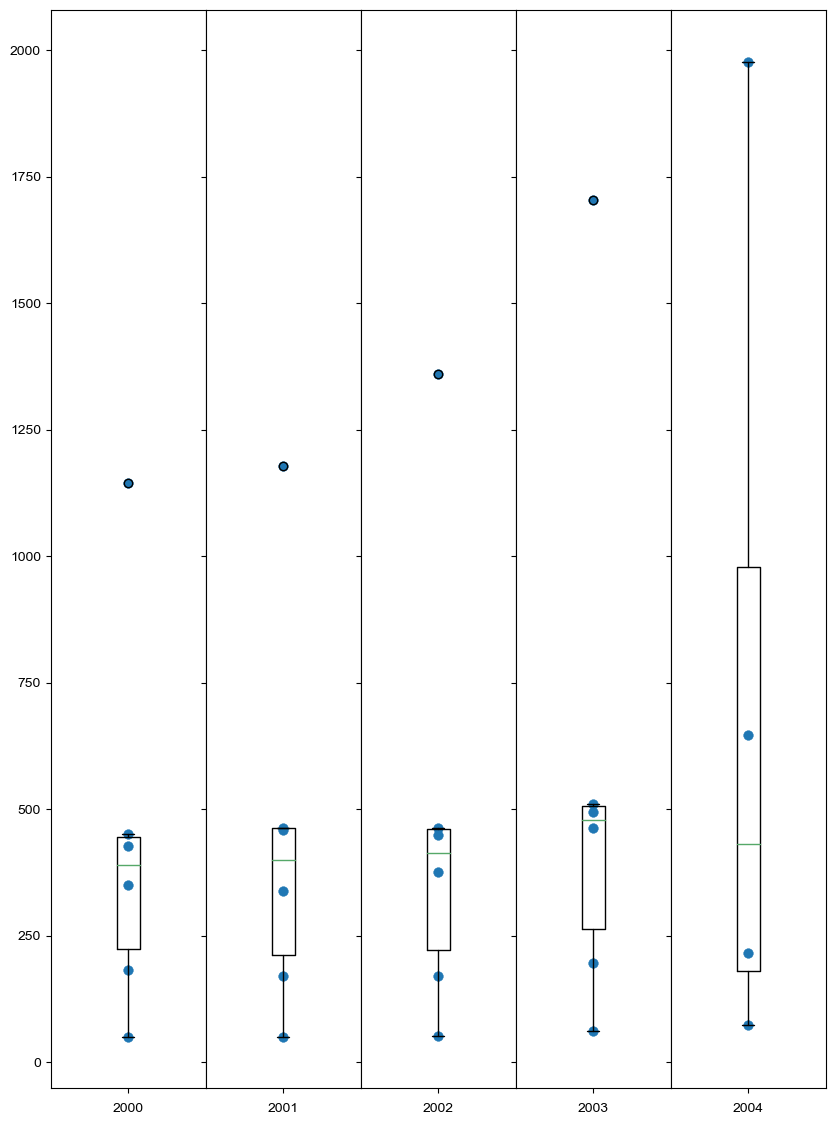

In [57]:
Year=[]
Year = [ i.split('-')[0] for i in df.Ano]
df['Year']=Year

New = df.copy()
New['Year'] = pd.to_datetime(df['Year']).dt.year

New2 = New.groupby(['Year', 'Region'])['Gasto en salud (per capita)'].mean()

New3 = New2.to_frame()
New3.reset_index(inplace=True)  
New3 = New3.drop(['Region'], axis=1)
New3 = New3[['Year', 'Gasto en salud (per capita)']]

fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(10, 14));
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('seaborn')
for i, colname in enumerate(New3['Year'].unique()):
    axs[i].boxplot(list(New3[New3['Year'] == colname].T.values[1]))
    axs[i].scatter(np.ones(New3[New3['Year'] == colname]['Gasto en salud (per capita)'].shape[0]), New3[New3['Year'] == colname]['Gasto en salud (per capita)'])
    axs[i].set_xticklabels([""])
    axs[i].set_xlabel(colname)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(0)

In [54]:
data=df.groupby(['Region','Ano','Gasto en salud (per capita)']).sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
data

Poblacion 0-14  Poblacion 15-64  \
Region Ano  Gasto en salud (per capita)                                    
Asia   2000 3.0                                   0.307            0.645   
            6.0                                   0.429            0.536   
            10.0                                  0.370            0.590   
            11.0                                  0.435            0.529   
            12.0                                  0.404            0.558   
...                                                 ...              ...   
africa 2004 213.0                                 0.400            0.567   
            227.0                                 0.246            0.689   
            268.0                                 0.362            0.607   
            410.0                                 0.312            0.647   
            421.0                                 0.250            0.673   

                                         Poblacion 65+  
Region Ano  Gasto en salud (per capita)                 
Asia   2000 3.0                                  0.047  
            6.0                                  0.035  
            10.0                                 0.041  
            11.0                                 0.036  
            12.0                                 0.038  
...                                                ...  
africa 2004 213.0                                0.033  
            227.0                                0.065  
            268.0                                0.032  
            410.0                                0.042  
            421.0                                0.076  

[778 rows x 3 columns]

Text(0.5, 0.98, 'Region/Ano')

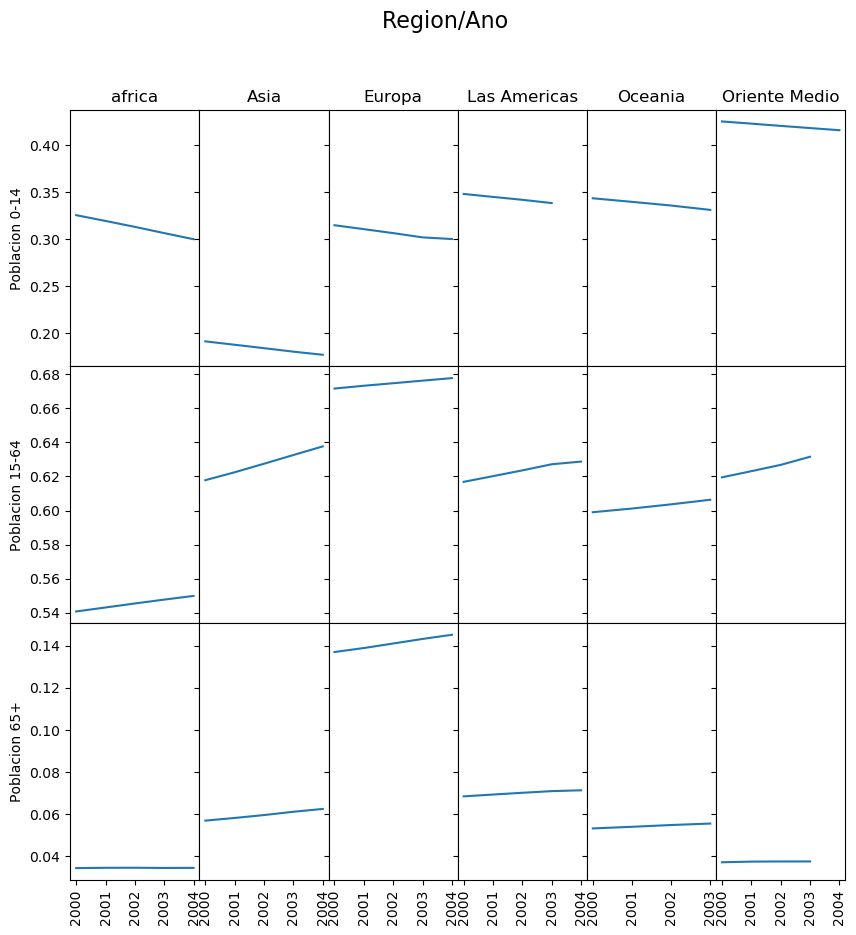

In [56]:
Year = []
Year = [ i.split('-')[0] for i in df.Ano]
df['Year'] = Year

New = df.copy()

Years = New.Year.unique()
AUX = pd.DataFrame()

fig1, axs = plt.subplots(3, 6, sharex='col', sharey='row', figsize=(10, 10))
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('default')
lista=['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']
for w, indname in enumerate(lista):
    for i, Anio in enumerate(Years):
        y=(New[New['Year'] == Anio].groupby('Region')[indname].mean()/100)
        AUX[Anio]=y
        y=[]
    AUX.index=New['Region'].unique()
    AUXT=AUX.T
    for i, colname in enumerate(AUXT.columns):
        axs[w,i].plot(AUXT[colname])
        if w==0:
            axs[w,i].set_title(colname)
        if i==0:
            axs[w,i].set_ylabel(indname)
        for tick in axs[w,i].get_xticklabels():
            tick.set_rotation(90)
fig1.suptitle('Region/Ano', fontsize=16)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

---